Analysis of fine dust influencing factors and suggestion of countermeasures

분석 배경:
- 우리나라 주요 도시의 미세먼지 PM10 연평균 농도는 전반적으로 감소하고 있습니다.  
그러나, 국내 미세먼지 농도는 뉴욕, 런던등 기타 OECD 국가의 주요도시 대비 여전히 높은 수준입니다.  

- 그래서 대기 중 오렴물질과 기상정보를 활용하여,
미세먼지 발생/증가에 영량을 미치는 인자를 도출하고 그 영향도를 분석하고자 합니다.

- 다양한 분석기법을 통해 미세먼지를 유발하는 영향 인자를 선정하고,  
선정된 영향 인자를 활용하여 미세먼지발생량을 줄이는 대응 방안을 제시하고자 합니다.

## 1. 가설 설정

목표 변수는 미세먼지발생량(PM10)이다.  

- 가설 1.  
2020년초, 코로나의 영향으로 중국의 공장 가동률이 낮아졌기 때문에,  
계절과 상관없이 2020년의 미세 먼지 발생량이 더 낮을 것입니다.  
(2019년은 7월~12의 데이터가 있고, 2020년에는 1월~6월의 데이터가 있습니다.)  
  
- 가설 2.  
서울시 교통량과 미세 먼지 발생량은 상관관계가 있을 것입니다.  

- 가설 3.  
풍향과 서울시 미세 먼지 발생량은 상관관계가 있을것입니다.
  
- 가설 4.  
중국 베이징시 미세먼지와 서울시 미세 먼지 발생량은 높은 상관관계가 있을 것입니다.
  
- 가설 5.  
서울시 미세먼지 발생량에 오전(O3)농도의 영향이 있을 것입니다.  
  
- 가설 6.  
서울시 미세먼지 발생량은 기온의 영향이 있을 것입니다. 

## 2. 데이터 처리

In [1]:
# 데이터 구성: Series, DataFrame
import pandas as pd 
# 행렬 계산
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 폰트 (맑은 고딕) 적용
matplotlib.rc('font',family='Malgun Gothic')
matplotlib.rc('axes',unicode_minus=False)

In [3]:
df_raw = pd.read_csv("D:/AIR_POLLUTION.csv", engine="python")
df_raw = df_raw[['MeasDate','PM10','PM10_T','PM10_J','PM10_B','O3','NO2','CO','SO2','TEMP','RAIN','RAIN_WEIGHT', 'WIND','WIND_DIR','HUMIDITY','ATM_PRESS','SNOW','SNOW_WEIGHT','CLOUD','TRAFIC']]

In [4]:
# df_raw의 MeasDate데이터를 시각화해서 나누어서 보기 
df_raw['year'] = df_raw['MeasDate'].str[0:4]
df_raw['month'] = df_raw['MeasDate'].str[5:7]
df_raw['day'] = df_raw['MeasDate'].str[8:11]

# 컬럼이 3개 늘어남을 확인할수 있습니다.
df_raw.shape

(366, 23)

In [5]:
# 월을 계절로 바꾸기, 0 : 겨울, 1 : 봄, 2 : 여름, 3 : 가을
df_raw['season'] = (df_raw['month'].astype(int) // 3) % 4

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MeasDate     366 non-null    object 
 1   PM10         365 non-null    float64
 2   PM10_T       366 non-null    int64  
 3   PM10_J       366 non-null    int64  
 4   PM10_B       366 non-null    int64  
 5   O3           365 non-null    float64
 6   NO2          365 non-null    float64
 7   CO           311 non-null    float64
 8   SO2          365 non-null    float64
 9   TEMP         366 non-null    float64
 10  RAIN         366 non-null    int64  
 11  RAIN_WEIGHT  366 non-null    float64
 12  WIND         366 non-null    float64
 13  WIND_DIR     366 non-null    int64  
 14  HUMIDITY     366 non-null    float64
 15  ATM_PRESS    366 non-null    float64
 16  SNOW         366 non-null    int64  
 17  SNOW_WEIGHT  366 non-null    float64
 18  CLOUD        366 non-null    float64
 19  TRAFIC  

In [7]:
df_raw.isnull().sum()

MeasDate        0
PM10            1
PM10_T          0
PM10_J          0
PM10_B          0
O3              1
NO2             1
CO             55
SO2             1
TEMP            0
RAIN            0
RAIN_WEIGHT     0
WIND            0
WIND_DIR        0
HUMIDITY        0
ATM_PRESS       0
SNOW            0
SNOW_WEIGHT     0
CLOUD           0
TRAFIC          0
year            0
month           0
day             0
season          0
dtype: int64

<AxesSubplot:>

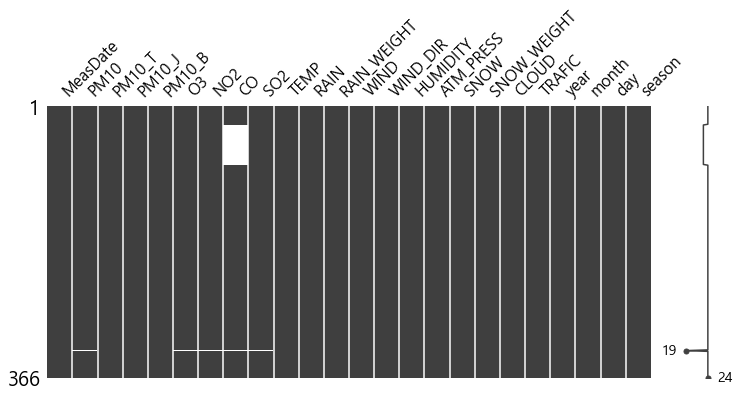

In [8]:
# 결측값 시각화로 보기 
import missingno as msno
msno.matrix(df_raw, figsize=(12,5))

결측치 확인 결과,  
1. CO(일산화탄소 농도)변수에 55개의 결측치가 존재 합니다. (설명변수)  
2. PM10(미세먼지 발생량)변수에 1개의 결측치가 존재합니다. (목표변수)
3. O3(오존 농도)변수에 1개의 결측치가 존재합니다. (설명변수)  
4. NO2(이산화질수 농도)변수에 1개의 결측치가 존재합니다. (설명변수)  
5. SO2(이황산가스 농도)변수에 1개의 결측치가 존재합니다. (설명변수)  

In [9]:
# 20년 5월의 값만 담은 데이터프레임 생성
mask = (df_raw['month'] == '05')
df_may = pd.DataFrame(df_raw.loc[mask])
df_may.head()

,MeasDate,PM10,PM10_T,PM10_J,PM10_B,O3,NO2,CO,SO2,TEMP,...,HUMIDITY,ATM_PRESS,SNOW,SNOW_WEIGHT,CLOUD,TRAFIC,year,month,day,season
305,2020-05-01,49.0,102,72,132,0.037,0.012,0.4,0.003,20.12,...,73.2,1003.0,0,0.0,6.42,8457365,2020,05,01,1
306,2020-05-02,44.0,73,81,81,0.027,0.012,0.4,0.002,20.24,...,80.0,1001.8,0,0.0,8.96,8560900,2020,05,02,1
307,2020-05-03,25.0,39,139,65,0.030,0.013,0.4,0.002,21.64,...,69.8,996.1,0,0.0,6.88,7675062,2020,05,03,1
308,2020-05-04,30.0,53,75,50,0.030,0.019,0.4,0.003,20.70,...,63.7,997.6,0,0.0,4.79,9724660,2020,05,04,1
309,2020-05-05,29.0,52,49,50,0.022,0.025,0.5,0.003,16.18,...,67.6,1001.4,0,0.0,5.42,8105997,2020,05,05,1


In [10]:
# 2020.05 데이터의 (PM10,O3,NO@,SO2) 컬럼 평균 구하기
print(df_may['PM10'].mean().round(1))
print(df_may['O3'].mean().round(3)) 
print(df_may['NO2'].mean().round(3))
print(df_may['SO2'].mean().round(3)) 

32.5
0.03
0.021
0.003


In [11]:
# 2020.05.24 의 (PM10,O3,NO2,SO2) 값을 2020.05데이터의 평균으로 대체하기
df_raw['PM10'].fillna(32.5, inplace=True)
df_raw['O3'].fillna(0.030, inplace=True)
df_raw['NO2'].fillna(0.021, inplace=True)
df_raw['SO2'].fillna(0.004, inplace=True)

In [12]:
# CO의 결측값은 평균값으로 대체
df_raw['CO'] = df_raw['CO'].fillna(df_raw['CO'].mean().round(1))

In [13]:
df_raw.isnull().sum()

MeasDate       0
PM10           0
PM10_T         0
PM10_J         0
PM10_B         0
O3             0
NO2            0
CO             0
SO2            0
TEMP           0
RAIN           0
RAIN_WEIGHT    0
WIND           0
WIND_DIR       0
HUMIDITY       0
ATM_PRESS      0
SNOW           0
SNOW_WEIGHT    0
CLOUD          0
TRAFIC         0
year           0
month          0
day            0
season         0
dtype: int64

In [14]:
# 데이터분할
from sklearn.model_selection import train_test_split

In [15]:
df_raw_y=df_raw['PM10']
df_raw_x=df_raw.drop("PM10",axis=1,inplace=False)

In [16]:
# Train Data와 Test Data로 분할 (7대 3의 비율)
df_train_x,df_test_x,df_train_y,df_test_y= train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)

## 3. 탐색적 분석

1) 년월에 따른 미세먼지발생 추이

<AxesSubplot:xlabel='month', ylabel='PM10'>

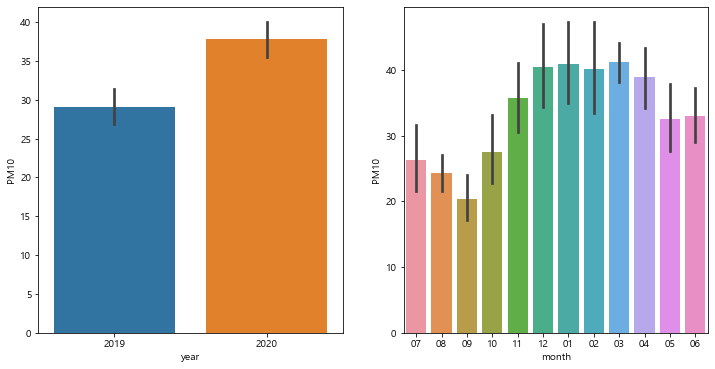

In [17]:
figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(12,6)

sns.barplot(data=df_raw, x='year', y='PM10', ax=ax1)
sns.barplot(data=df_raw, x='month', y='PM10', ax=ax2)

- (1) 연도별 미세먼지발생량(PM10)은 2019년보다 2020년이 더 높은것을 확인할 수 있습니다.
- (2) 월별 미세먼지발생량(PM10)은 3월에 가장 높고 12월 1~4월에도 높습니다. 그리고 9월에 가장 적습니다.


2) 계절에 따른 미세먼지발생 추이

[Text(0.5, 0, '계절(겨울 : 0 , 봄 : 1 , 여름 : 2 , 가을 : 3)'),
 Text(0, 0.5, 'PM10'),
 Text(0.5, 1.0, '계절별 미세먼지발생량')]

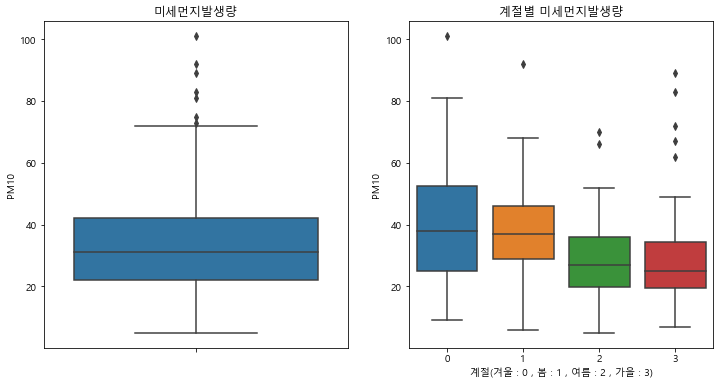

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12,6)


sns.boxplot(data=df_raw, y='PM10', orient='v', ax=axes[0])
sns.boxplot(data=df_raw, y='PM10', x='season',orient='v', ax=axes[1])


axes[0].set(ylabel = 'PM10', title ='미세먼지발생량')
axes[1].set(xlabel = '계절(겨울 : 0 , 봄 : 1 , 여름 : 2 , 가을 : 3)', ylabel = 'PM10', title ='계절별 미세먼지발생량')

- (1) 계절별 미세먼지발생량(PM10)은 겨울>봄>여름>가을 순으로 높습니다.
- (2) 겨울 과 봄은 미세먼지발생량(PM10)이 평균 이상이고, 여름과 가을은 평균 이하 입니다.


3) 대기오염에 해당하는 설명변수들

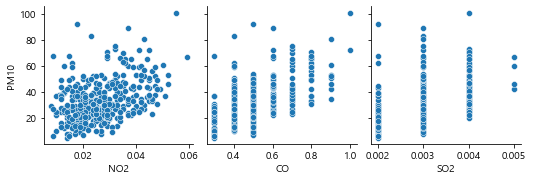

In [19]:
sns.pairplot(df_raw, y_vars="PM10", x_vars=["NO2", "CO", "SO2"], diag_kind = None)

4) 기상정보에 해당하는 설명변수들

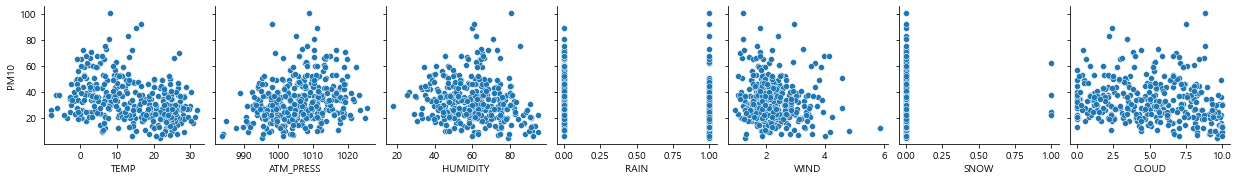

In [20]:
sns.pairplot(df_raw, y_vars="PM10", x_vars=["TEMP", "ATM_PRESS", "HUMIDITY",'RAIN','WIND','SNOW', 'CLOUD'], diag_kind = None)

5) 고려대상에 해당하는 설명변수들

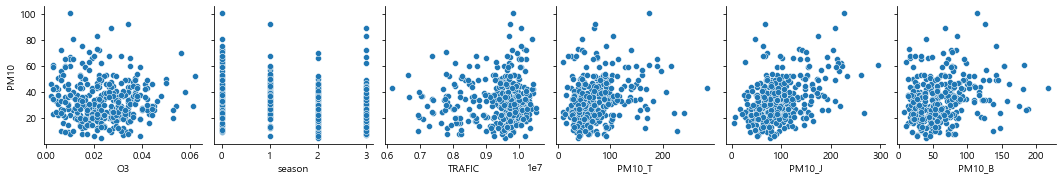

In [21]:
sns.pairplot(df_raw, y_vars="PM10", x_vars=["O3", "season", "TRAFIC", 'PM10_T', 'PM10_J', 'PM10_B'], diag_kind = None)

---

상관분석 가설검정(피어슨) 

가설1
2020년초, 코로나의 영향으로 중국의 공장 가동률이 낮아졌기 때문에,  
계절과 상관없이 2020년의 미세 먼지 발생량이 더 낮을 것입니다.  

In [22]:
from scipy import stats

In [23]:
corr , pval = stats.pearsonr(df_raw_y, df_raw_x["season"])
print(corr)
print(pval)

-0.3364904080126345
3.865889493087086e-11


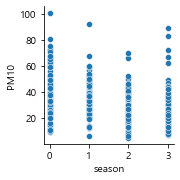

In [24]:
sns.pairplot(df_raw, y_vars= ["PM10"], x_vars = ["season"])  

가설 2.  
서울시 교통량과 미세 먼지 발생량은 상관관계가 있을 것입니다.  

In [25]:
corr , pval = stats.pearsonr(df_raw_y, df_raw_x["TRAFIC"])
print(corr)
print(pval)

0.051410515939583706
0.32667883000735076


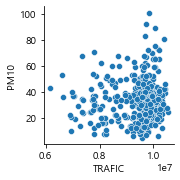

In [26]:
sns.pairplot(df_raw, y_vars= ["PM10"], x_vars = ["TRAFIC"])  

가설 3.  
풍향과 서울시 미세 먼지 발생량은 상관관계가 있을것입니다.
  


In [27]:
corr , pval = stats.pearsonr(df_raw_y, df_raw_x["WIND_DIR"])
print(corr)
print(pval)

0.01983018087791987
0.7053465277043336


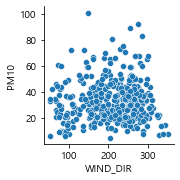

In [28]:
sns.pairplot(df_raw, y_vars= ["PM10"], x_vars = ["WIND_DIR"])  

가설 4.  
중국 베이징시 미세먼지와 서울시 미세 먼지 발생량은 높은 상관관계가 있을 것입니다.
  


In [29]:
corr , pval = stats.pearsonr(df_raw_y, df_raw_x["PM10_B"])
print(corr)
print(pval)

0.22910975745564355
9.548183965919542e-06


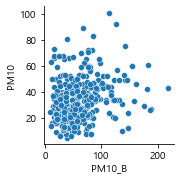

In [30]:
sns.pairplot(df_raw, y_vars= ["PM10"], x_vars = ["PM10_B"])  

가설 5.  
서울시 미세먼지 발생량에 오전(O3)농도의 영향이 있을 것입니다.  
  


In [31]:
corr , pval = stats.pearsonr(df_raw_y, df_raw_x["O3"])
print(corr)
print(pval)

-0.051827962960408556
0.32276085653542064


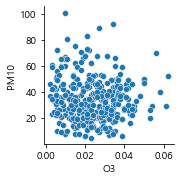

In [32]:
sns.pairplot(df_raw, y_vars= ["PM10"], x_vars = ["O3"])  

가설 6.  
서울시 미세먼지 발생량은 기온의 영향이 있을 것입니다. 


In [33]:
corr , pval = stats.pearsonr(df_raw_y, df_raw_x["TEMP"])
print(corr)
print(pval)

-0.30978576717066114
1.396400800412376e-09


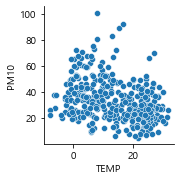

In [34]:
sns.pairplot(df_raw, y_vars= ["PM10"], x_vars = ["TEMP"])  

In [35]:
df_raw.corr()

,PM10,PM10_T,PM10_J,PM10_B,O3,NO2,CO,SO2,TEMP,RAIN,RAIN_WEIGHT,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,SNOW_WEIGHT,CLOUD,TRAFIC,season
PM10,1.000000,0.231115,0.418370,0.229110,-0.051828,0.395883,0.560574,0.427075,-0.309786,-0.150449,-0.121443,-0.100357,0.019830,-0.149537,0.252929,-0.011529,-0.019990,-0.172133,0.051411,-0.336490
PM10_T,0.231115,1.000000,0.599346,0.781899,-0.207259,0.339030,0.260314,0.239527,-0.214889,-0.164655,-0.111515,-0.068064,-0.126537,-0.194364,0.253806,-0.109329,-0.119237,-0.151779,0.007155,-0.037640
PM10_J,0.418370,0.599346,1.000000,0.421582,-0.306592,0.420960,0.433510,0.341740,-0.393478,-0.159028,-0.085355,-0.105926,-0.038787,-0.157263,0.347393,-0.063197,-0.121464,-0.209992,0.059725,-0.106829
PM10_B,0.229110,0.781899,0.421582,1.000000,-0.131663,0.314668,0.219798,0.194552,-0.077096,-0.141952,-0.064581,-0.070287,-0.171461,-0.129806,0.160210,-0.118177,-0.123242,-0.112978,-0.014161,0.030225
O3,-0.051828,-0.207259,-0.306592,-0.131663,1.000000,-0.591998,-0.513290,-0.231043,0.516499,-0.122488,-0.102328,0.166256,0.269399,-0.035219,-0.534869,-0.021221,0.003746,-0.117523,-0.092651,0.164058
NO2,0.395883,0.339030,0.420960,0.314668,-0.591998,1.000000,0.790904,0.559027,-0.237829,-0.106489,0.027770,-0.537205,-0.408953,-0.067717,0.420975,-0.100342,-0.120678,0.015053,0.257389,-0.017209
CO,0.560574,0.260314,0.433510,0.219798,-0.513290,0.790904,1.000000,0.564746,-0.362011,-0.031467,0.029536,-0.403018,-0.318718,0.043144,0.400527,-0.028564,-0.054333,0.025941,0.082651,-0.247916
SO2,0.427075,0.239527,0.341740,0.194552,-0.231043,0.559027,0.564746,1.000000,-0.271168,-0.270861,-0.124198,-0.248187,-0.090034,-0.293657,0.329324,-0.041252,-0.103029,-0.185927,0.200220,-0.114183
TEMP,-0.309786,-0.214889,-0.393478,-0.077096,0.516499,-0.237829,-0.362011,-0.271168,1.000000,0.162455,0.078213,-0.214908,-0.049674,0.404279,-0.792049,-0.221860,-0.184570,0.342033,0.007913,0.620529
RAIN,-0.150449,-0.164655,-0.159028,-0.141952,-0.122488,-0.106489,-0.031467,-0.270861,0.162455,1.000000,0.506352,0.167850,-0.157808,0.582779,-0.346387,0.099018,0.095215,0.607322,-0.136522,0.026443


C:\Users\NOH TAEYUN\AppData\Local\Temp\ipykernel_1956\1768464533.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(dfcorr, dtype=np.bool)


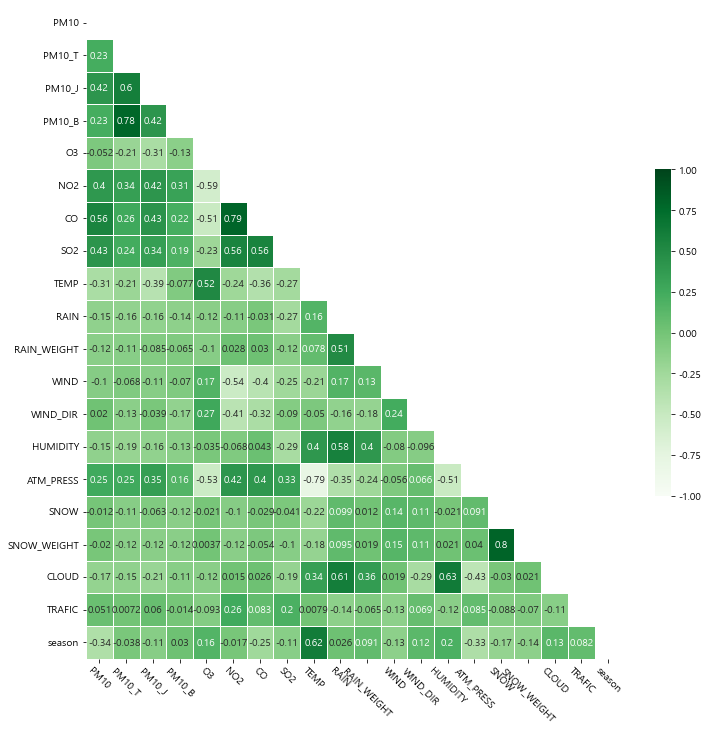

In [36]:
dfcorr = df_raw.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(12,12) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(dfcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(dfcorr, 
            cmap = 'Greens', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.xticks(rotation = - 45 )
plt.show()

## 4. 모델링

### 4-1. 다중회귀분석

In [37]:
# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형모델 formula
import statsmodels.formula.api as smf
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 학습용/평가용 데이터 분리: train, test
from sklearn.model_selection import train_test_split
# 선형회귀 모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진 제거법)
from sklearn.feature_selection import RFE
# scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score

In [38]:
# df_raw의 MeasDate 컬럼 제거
df_raw.drop(['MeasDate'], axis=1, inplace=True)
df_raw.drop(['year'], axis=1, inplace=True)
df_raw.drop(['month'], axis=1, inplace=True)
df_raw.drop(['day'], axis=1, inplace=True)

In [39]:
# 선형 회귀 분석 : formula
reg_model = smf.ols(formula = "PM10 ~ PM10_T + PM10_J + PM10_B + O3 + NO2 + CO + SO2 + TEMP + WIND + WIND_DIR + HUMIDITY + ATM_PRESS + CLOUD + TRAFIC + season", data=df_raw)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     28.84
Date:                Mon, 15 Aug 2022   Prob (F-statistic):           3.56e-52
Time:                        21:50:23   Log-Likelihood:                -1384.4
No. Observations:                 366   AIC:                             2801.
Df Residuals:                     350   BIC:                             2863.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    147.6868    158.603      0.931      0.3

In [40]:
# 설명변수 간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_raw_x = df_raw.drop("PM10", axis=1)

# statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)

# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]

# VIF 정렬
df_vif.sort_values("VIF", ascending=True).round(2)

,variable,VIF
18,TRAFIC,1.23
10,RAIN_WEIGHT,1.54
12,WIND_DIR,1.70
7,SO2,1.96
11,WIND,2.10
2,PM10_J,2.17
9,RAIN,2.23
17,CLOUD,2.39
19,season,2.42
3,PM10_B,2.79


후진제거법을 통한 중요도 변수 선택

In [41]:
# 목표 변수 분리
df_raw_y = df_raw["PM10"]
# sklearn의 선형회귀 모델
model = LinearRegression()

# 전체변수 중 5개의 변수가 남을 때까지 변수 선택
rfe = RFE(estimator = model, n_features_to_select=5).fit(df_raw_x, df_raw_y)

# 선택된 변수
selected_cols = df_raw_x.columns[rfe.support_]

# 제거된 변수
removed_cols = df_raw_x.columns[~rfe.support_]

print("후진제거법 적용 후 선택된 변수들 : {}".format(selected_cols))
print("후진제거법 적용 후 제거된 변수들: {}".format(removed_cols))

후진제거법 적용 후 선택된 변수들 : Index(['O3', 'NO2', 'CO', 'SO2', 'WIND'], dtype='object')
후진제거법 적용 후 제거된 변수들: Index(['PM10_T', 'PM10_J', 'PM10_B', 'TEMP', 'RAIN', 'RAIN_WEIGHT', 'WIND_DIR',
       'HUMIDITY', 'ATM_PRESS', 'SNOW', 'SNOW_WEIGHT', 'CLOUD', 'TRAFIC',
       'season'],
      dtype='object')


In [42]:
# 회귀 모델 생성
rfe_reg_model = smf.ols(formula="PM10 ~ O3 + NO2 + CO + SO2 + WIND", data=df_raw)

# 적합
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     54.42
Date:                Mon, 15 Aug 2022   Prob (F-statistic):           5.15e-42
Time:                        21:50:23   Log-Likelihood:                -1428.7
No. Observations:                 366   AIC:                             2869.
Df Residuals:                     360   BIC:                             2893.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -40.3438      5.696     -7.083      0.0

- 분석 자료 수 : 366
- 잔차 자유도 : 360
- 모델 자유도 : 5


- 분산 분석 결과 : p값이 유의수준 0.05보다 작으므로 회귀모델로서 유의합니다.


- 설명력(0.430) : 모델을 통하여 설명변수를 43%를 설명할 수 있습니다.
- 회귀계수 검정
    - 절편의 유의성 검토하지 않습니다. 
    - 회귀식에는 절편의 유의성 상관없이 절편 포함합니다.
    - 모든 설명변수의 회귀계수 유의합니다.

- 최종 모델 회귀식  
ŷ = -40.3438  + 477.6900 O3 + 210.4442 NO2 + 73.8476 CO + 2894.9466 SO + 4.5212 WIND

In [43]:
# 남은변수들 다중공선성 재진단
df_raw_x_rfe = df_raw_x[selected_cols]
df_raw_x_rfe_const = add_constant(df_raw_x_rfe)

# 다중공선성 저장
df_rfe_vif = pd.DataFrame()
df_rfe_vif["variable"] = df_raw_x_rfe_const.columns
df_rfe_vif["VIF"] = [variance_inflation_factor(df_raw_x_rfe_const.values, i) for i in range(df_raw_x_rfe_const.shape[1])]
df_rfe_vif.sort_values("VIF",inplace = True)
df_rfe_vif.round(3)

# 선택된 설명변수에 다중공선성은 문제가 없음을 확인할 수 있습니다.

,variable,VIF
5,WIND,1.498
4,SO2,1.615
1,O3,1.698
3,CO,2.887
2,NO2,4.121
0,const,81.166


최종 회귀모델 도출

<AxesSubplot:>

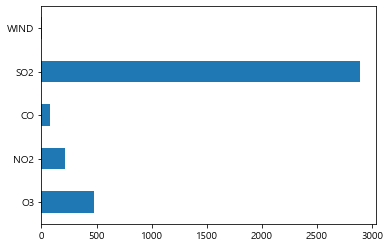

In [44]:
df_reg_coef = pd.DataFrame({"Coef":rfe_reg_result.params.values[1:]},index = selected_cols)
df_reg_coef.plot.barh(y = "Coef", legend = False)

In [45]:
# 설명변수 표준화 적용 -> 표준화 회귀계수 산출 목적
scaler = StandardScaler()

# Scale 변환대상 변수 : 일반적으로 설명변수
cols = df_raw_x.columns

# Scale 변환
np_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(np_scaled, columns = cols)

# 목표변수 추가
df_scaled['PM10'] =df_raw['PM10']
reg_model_scaled = smf.ols(formula = "PM10 ~ O3 + NO2 + CO + SO2 + WIND",
                          data = df_scaled)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     54.42
Date:                Mon, 15 Aug 2022   Prob (F-statistic):           5.15e-42
Time:                        21:50:24   Log-Likelihood:                -1428.7
No. Observations:                 366   AIC:                             2869.
Df Residuals:                     360   BIC:                             2893.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.4194      0.632     52.863      0.0

<AxesSubplot:>

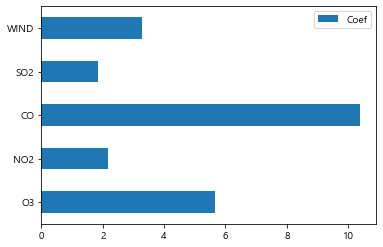

In [46]:
# 설명변수 중요도(표준화 적용 이전) -> 표준화 회귀계수 산출해야 함
df_reg_scaled_coef = pd.DataFrame({"Coef":reg_result_scaled.params.values[1:]}, 
                           index=selected_cols)
df_reg_scaled_coef.plot.barh(y='Coef', legend=True)

- 표준화된 설명변수에서는 CO(일산화탄소 농도)가 높아질수록 미세먼지농도(PM10)가 높습니다.  
  
CO > O3 > WIND > NO2 > SO2

In [47]:
#평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [48]:
#평가함수 정의

#RMSE
def root_mean_squared_error(y_true, y_pred) :
    return np.sqrt(mean_squared_error(y_true, y_pred))

#MAPE
def mean_absolute_percentage_error(y_true, y_pred) : 
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [49]:
#예측 및 평가
models = ["Regression", "Decision Tree", "Random Forest", "Gradient Boosting"]

mse, rmse, mae, mape = [],[],[],[]

###회귀분석
#예측 
reg_y_pred = rfe_reg_result.predict(df_test_x)
#평가
mse.append(mean_squared_error(df_test_y, reg_y_pred))
rmse.append(root_mean_squared_error(df_test_y, reg_y_pred))
mae.append(mean_absolute_error(df_test_y, reg_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, reg_y_pred))

In [50]:
df_pred = pd.DataFrame({'prediction':rfe_reg_result.predict(df_test_x)})
df_pred.describe()

,prediction
count,110.000000
mean,33.514175
std,11.369051
min,4.559888
25%,25.691748
50%,30.947517
75%,40.712244
max,66.950800


In [51]:
df_test_y.describe()

count    110.000000
mean      34.945455
std       17.006656
min       10.000000
25%       22.000000
50%       33.000000
75%       43.750000
max      101.000000
Name: PM10, dtype: float64

### 4-2 다중선형회귀분석_규제화

목표변수, 설명변수 데이터 지정

In [52]:
# ridge, lasso, elasticnet 
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [53]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw["PM10"]
df_raw_x = df_raw.drop("PM10", axis=1, inplace=False)

ElasticNet을 이용해서 회귀분석

In [54]:
# 설명력 결과 저장
train_score = []

# a : 규제화 강도
para_alpha = [n_alpha * 0.1 for n_alpha in range(1, 11)]

for v_alpha in para_alpha:
    elastic = ElasticNet(random_state=1234, alpha=v_alpha)
    elastic.fit(df_raw_x, df_raw_y)
    train_score.append(elastic.score(df_raw_x, df_raw_y))
    
# 결과 저장
df_score_alpha = pd.DataFrame()
df_score_alpha["Alpha"] = para_alpha
df_score_alpha["TrainScore"] = train_score
df_score_alpha

,Alpha,TrainScore
0,0.1,0.357771
1,0.2,0.331342
2,0.3,0.319265
3,0.4,0.311525
4,0.5,0.305516
5,0.6,0.300437
6,0.7,0.295935
7,0.8,0.291835
8,0.9,0.288043
9,1.0,0.284499


In [55]:
# 최종 모델
elastic = ElasticNet(random_state=1234, alpha=0.1)
elastic.fit(df_raw_x, df_raw_y)

ElasticNet(alpha=0.1, random_state=1234)

In [56]:
# 절편값 확인
print(elastic.intercept_)

60.36803699464133


In [57]:
# 회귀계수 확인
df_elastic_coef = pd.DataFrame({"Coef": elastic.coef_}, index=df_raw_x.columns)
df_elastic_coef

,Coef
PM10_T,-7.419753e-02
PM10_J,1.259108e-01
PM10_B,1.023045e-01
O3,0.000000e+00
NO2,0.000000e+00
CO,1.064788e+01
SO2,0.000000e+00
TEMP,6.044639e-02
RAIN,-5.410395e-01
RAIN_WEIGHT,-2.575510e-01


<AxesSubplot:>

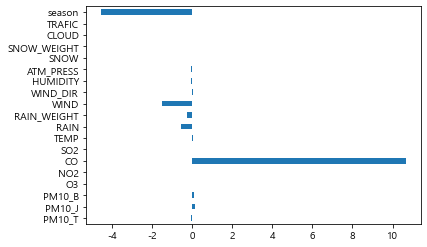

In [58]:
# 회귀계수 그래프
df_elastic_coef.plot.barh(y="Coef", legend=False)

- 중요 설명변수 : CO(일산화질소농도), season(계절) 의 영향이 크다고 해석할 수 있습니다.
- WIND, RAIN, RAIN_WEIGHT, TEMP, WIND_DIR, HUMIDITY, ATM_PRESS, PM10_B, PM10_J, PM10_T 의 영향도 확인할 수 있습니다.

### 4-3 의사결정 나무 모델링 

In [59]:
# export_grahpvis : 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무구조시각화
import graphviz

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

데이터 구성하기

In [60]:
# 목표 변수, 설명 변수 데이터 지정
df_raw_y = df_raw["PM10"]
df_raw_x = df_raw.drop("PM10", axis=1, inplace=False)

In [61]:
# 데이터 분할

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)

print("train data x size : {}".format(df_train_x.shape))
print("train data y size : {}".format(df_train_y.shape))
print("test data x size : {}".format(df_test_x.shape))
print("test data y size : {}".format(df_test_y.shape))

train data x size : (256, 19)
train data y size : (256,)
test data x size : (110, 19)
test data y size : (110,)


모델 생성

In [62]:
# 기본 옵션으로 모델 생성
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print("score on traing set : {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))

# test 데이터 설명력
print("score on test set : {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

score on traing set : 1.000
score on test set : 0.161


모델 parmeter 조정

min_samples_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [63]:
# train, test 설명력 결과 저장
train_score = []; test_score = []

# min_samples_leaf : 잎사귀 최소 자료수
para_leaf = [n_leaf*1 for n_leaf in range(1, 10)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234, 
                                 min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))


# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

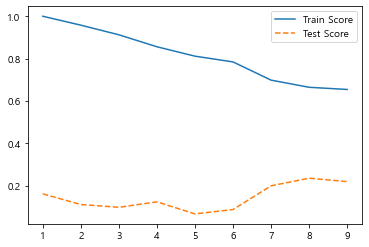

In [64]:
# 모델 설명력 확인
df_score_leaf.round(3)

# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.legend()

- 잎사귀 노드 최소 자료 수 증가에 따라 모델의 설명력은 감소
- train/test 데이터의 성능 변화를 고려하여 1 선택

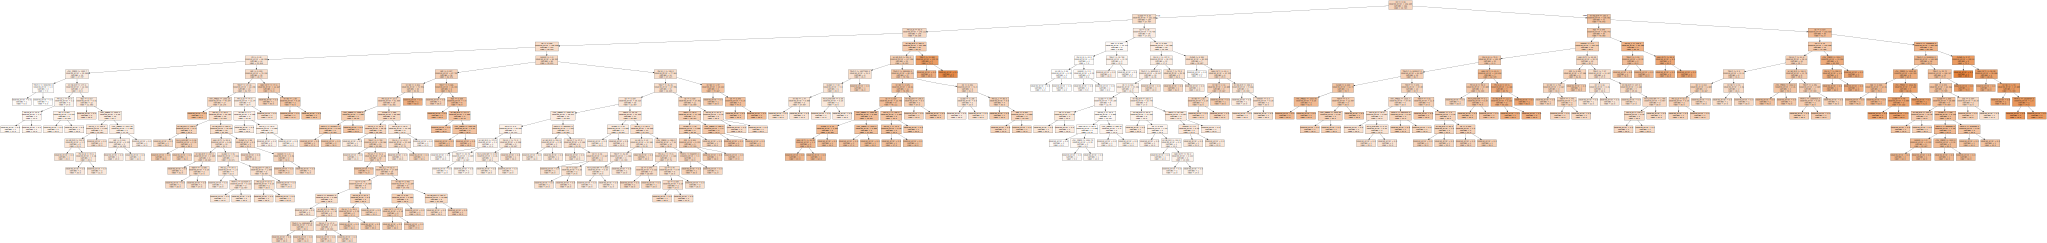

In [65]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 노드의 최소 자료수 = 8 모델
tree_graph = DecisionTreeRegressor(random_state=1234,min_samples_leaf=1)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_leaf.dot",
            feature_names=v_feature_name, impurity=True, filled=True)

with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능

In [66]:
# train, test 설명력 결과 저장
train_score = [];
test_score = []

# min_samples_split : 분리노드 최소 자료수
para_split = [n_split*2 for n_split in range(2, 20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=9,
                        min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))


# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

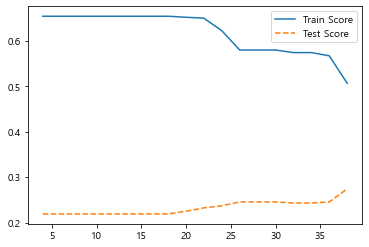

In [67]:
# 모델 설명력 확인
df_score_split.round(3)

# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.legend()

- 분리 노드 최소 자료 수 증가에 따라 모델의 설명력은 감소
- train/test 데이터의 성능 변화를 고려하여 28 선택

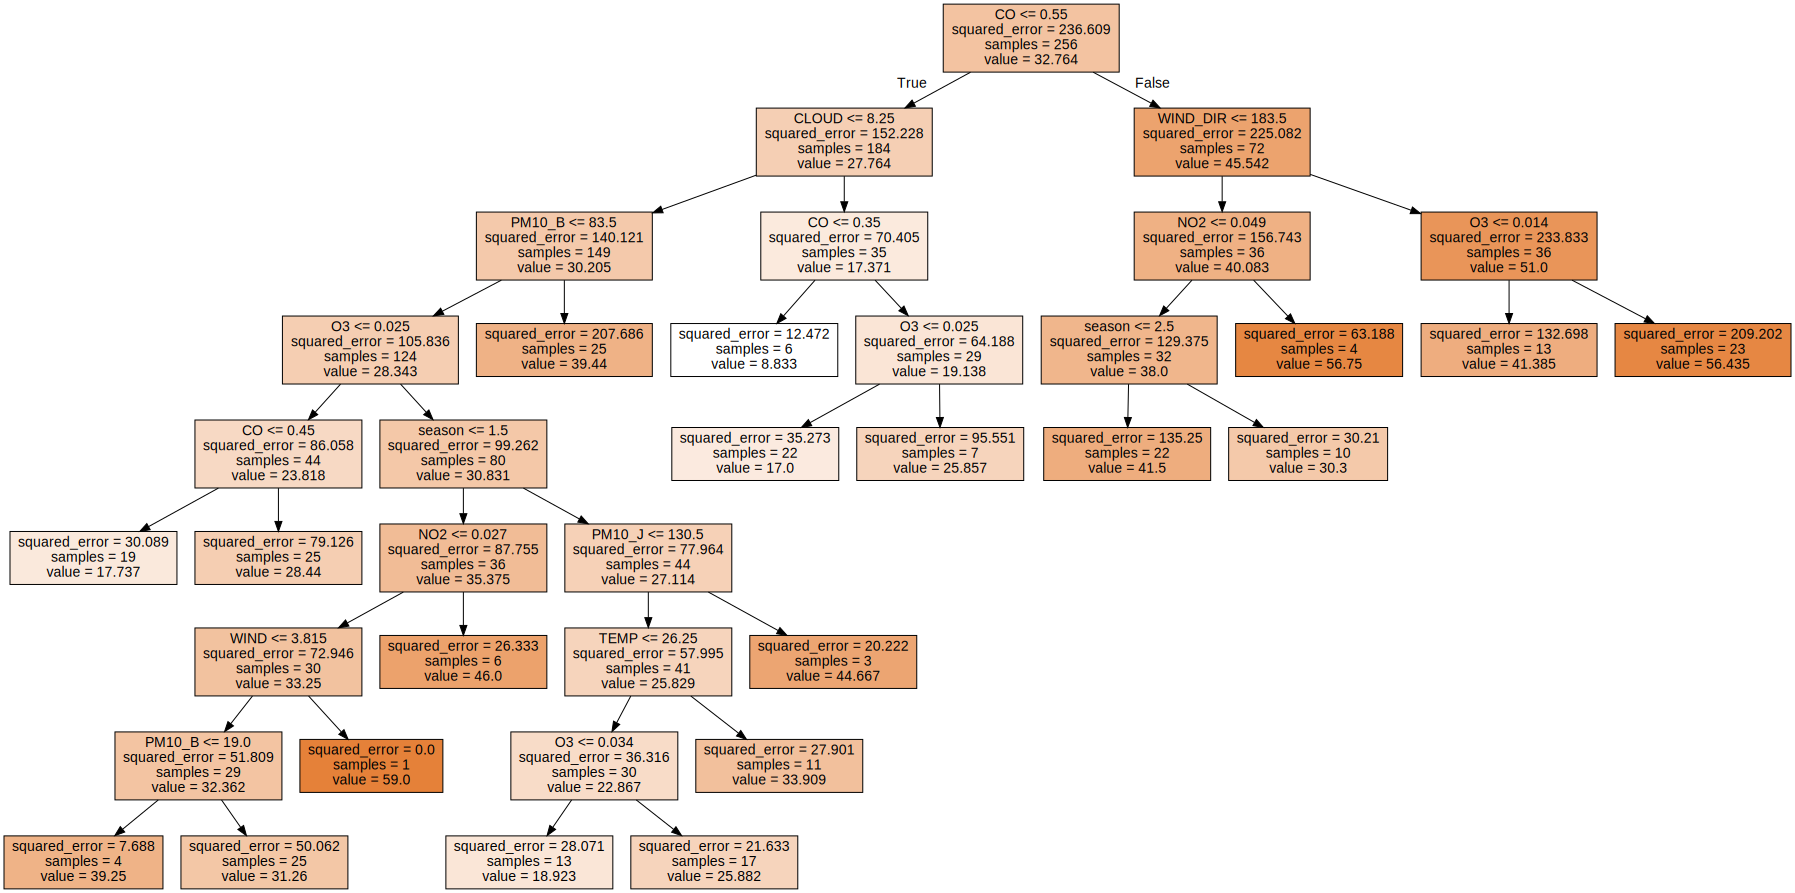

In [68]:
# 분리 노드의 최소 자료수 = 28인 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=1, 
                                   min_samples_split=28)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_split.dot",
               feature_names=v_feature_name, impurity=True, filled=True)

with open("tree_split.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

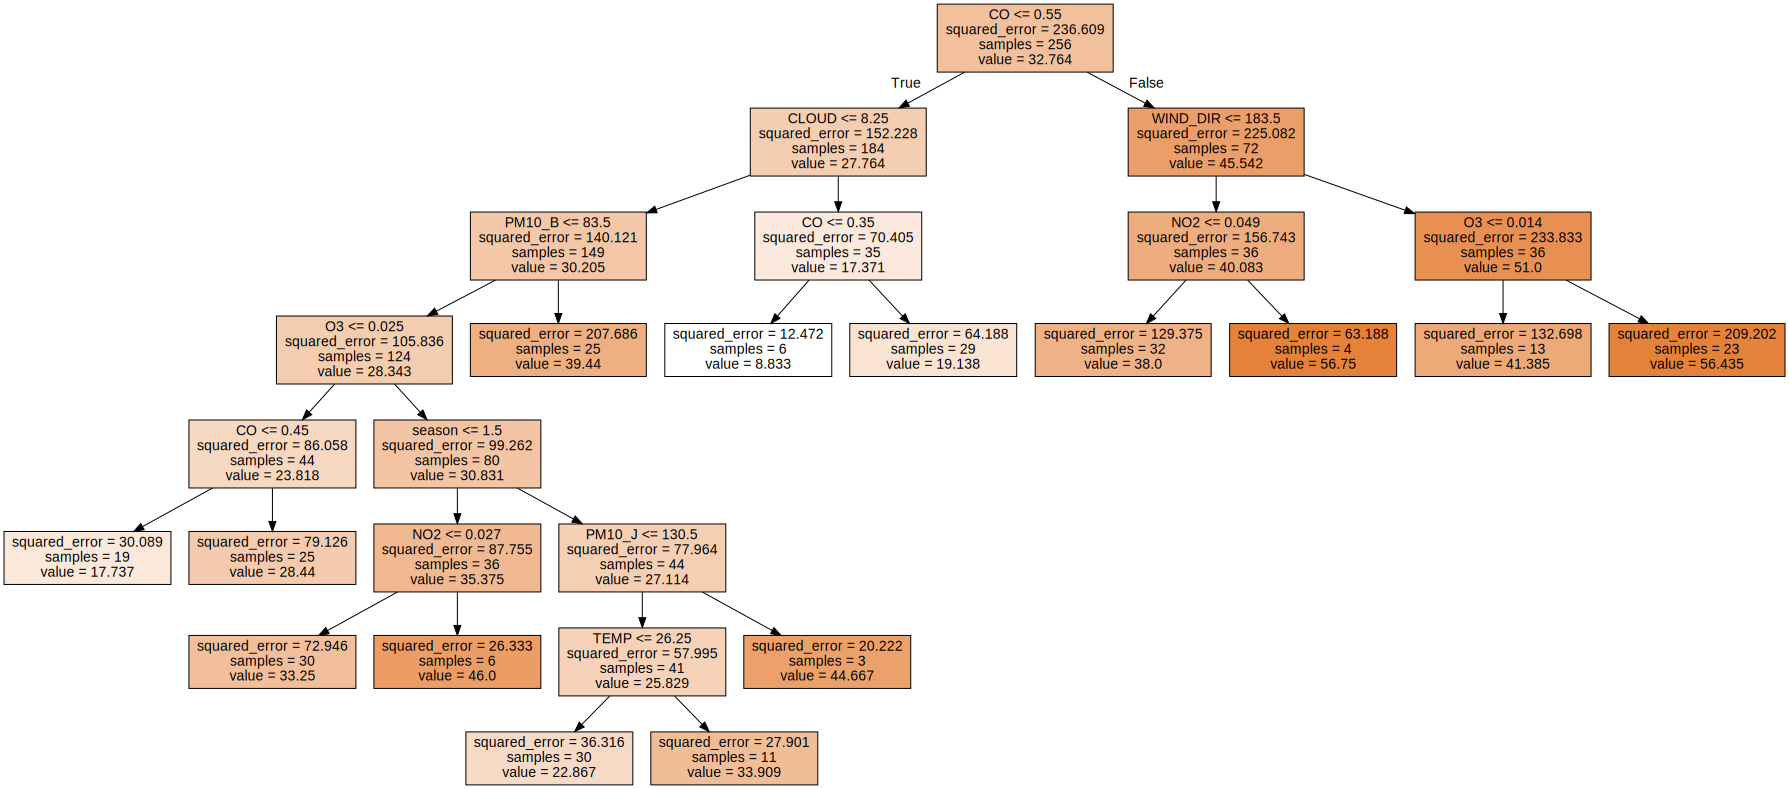

In [69]:
# 분리 노드의 최소 자료수 = 35인 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=1, 
                                   min_samples_split=35)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_split.dot",
               feature_names=v_feature_name, impurity=True, filled=True)

with open("tree_split.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

max_depth : 최대 깊이 변경에 따른 모델 성능

In [70]:
# train, test 설명력 결과 저장
train_score = []; test_score = []

# max_depth : 최대 길이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=1, 
                                 min_samples_split=28, max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))


# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

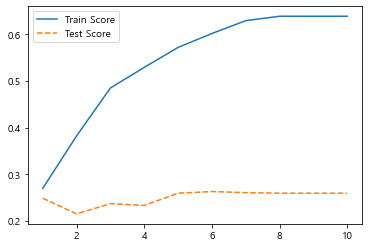

In [71]:
# 모델 설명력 확인
df_score_depth.round(3)

# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.legend()

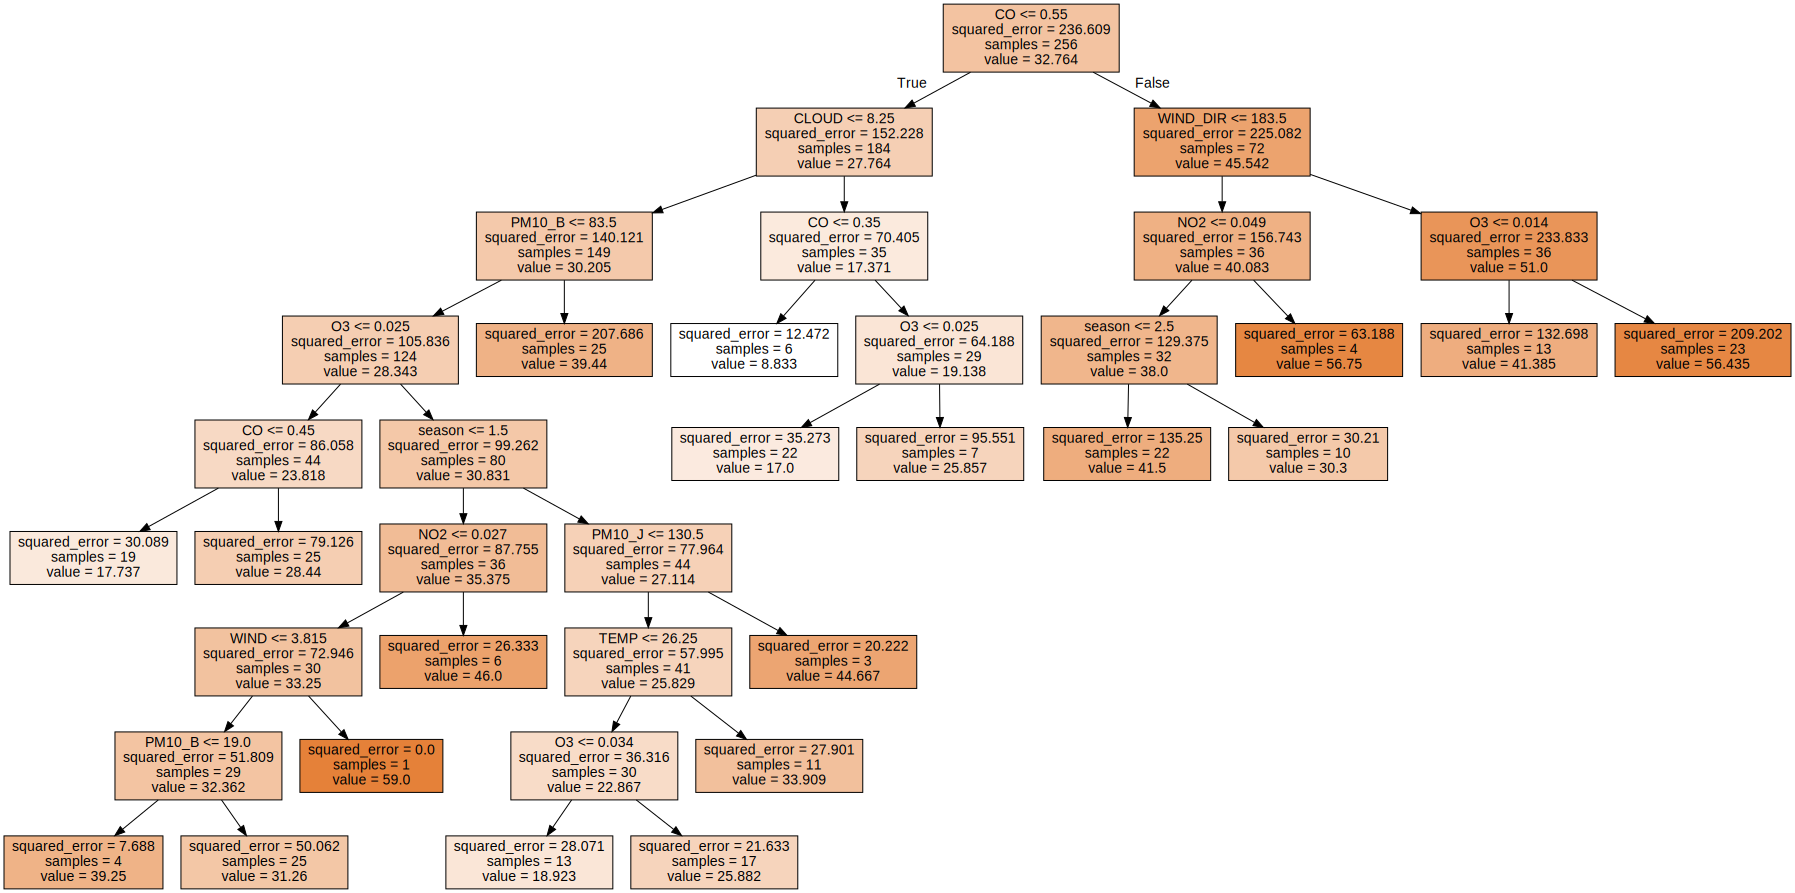

In [72]:
# 최대 깊이 = 10인 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=1, 
                                   min_samples_split=28, max_depth=10)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_depth.dot",
               feature_names=v_feature_name, impurity=True, filled=True)

with open("tree_depth.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

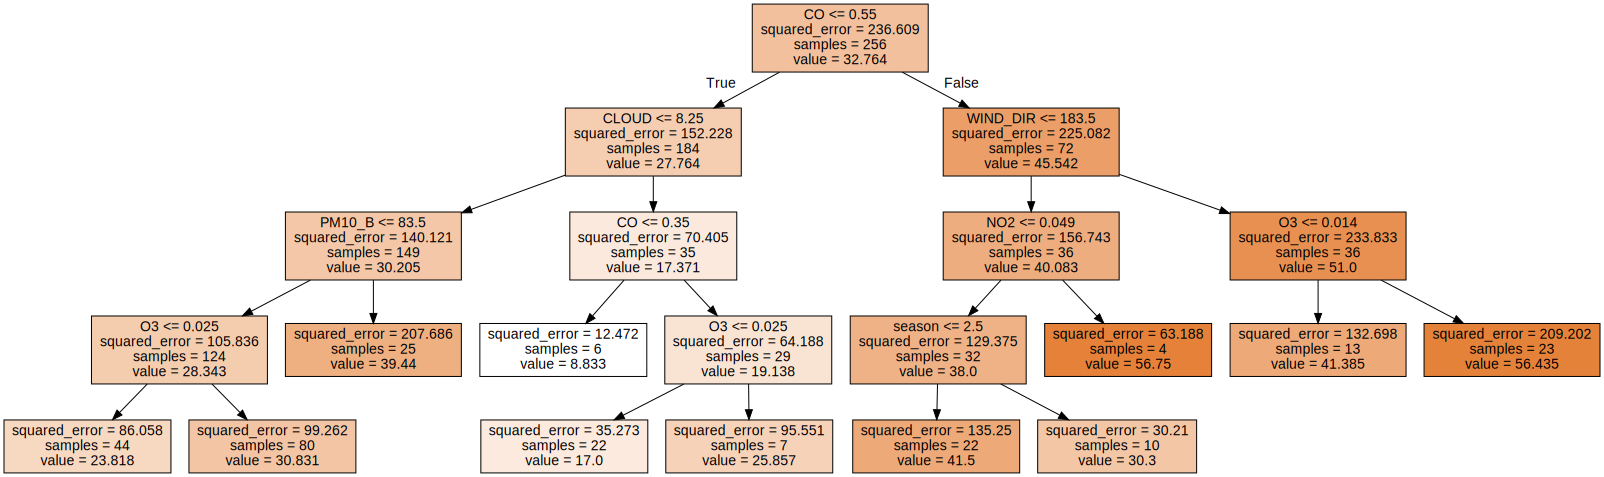

In [73]:
# 최대 깊이 = 4인 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=1, 
                            min_samples_split=28, max_depth=4)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_depth.dot",
               feature_names=v_feature_name, impurity=True, filled=True)

with open("tree_depth.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [74]:
estimator = DecisionTreeRegressor()
param_grid = {"criterion":["mse","friedman_mse", "mae"], "max_features":["auto","sqrt","log2"],
              "max_depth":para_depth,"min_samples_split":para_split, "min_samples_leaf":para_leaf}
            
grid_dt = GridSearchCV(estimator, param_grid, scoring = "r2", n_jobs = -1)

grid_dt.fit(df_train_x, df_train_y)

print("best estimator model:\n{}".format(grid_dt.best_estimator_))
print("\nbest parameter model:\n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))

best estimator model:
DecisionTreeRegressor(criterion='mae', max_depth=7, max_features='sqrt',
                      min_samples_leaf=9, min_samples_split=4)

best parameter model:
{'criterion': 'mae', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 4}

best score:
0.364


c:\dev\Python310\lib\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


In [75]:
tree_final = DecisionTreeRegressor(min_samples_leaf=1, min_samples_split=28, 
                                   max_depth=10, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeRegressor(max_depth=10, min_samples_split=28, random_state=1234)

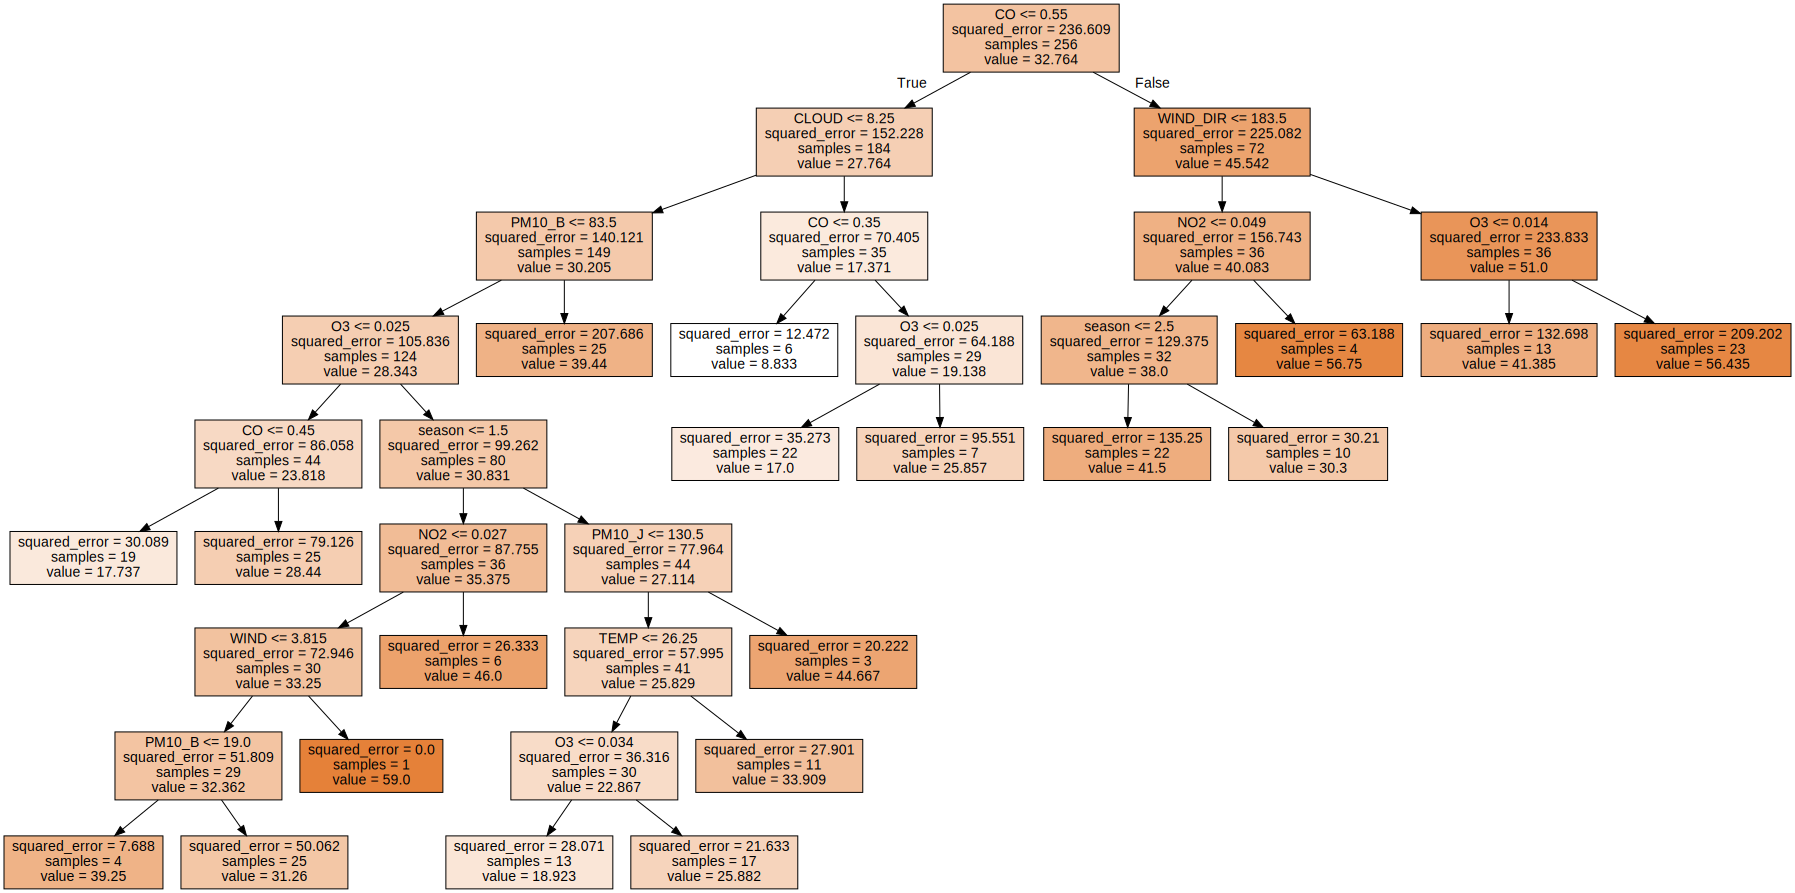

In [76]:
export_graphviz(tree_final, out_file="tree_final.dot",
               feature_names=v_feature_name, impurity=True, filled=True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [77]:
# train 데이터 설명력
print("Score on traing set : {:.3f}".format(tree_final.score(df_train_x, df_train_y)))

# test 데이터 설명력
print("Score on test set : {:.3f}".format(tree_final.score(df_test_x, df_test_y)))

Score on traing set : 0.639
Score on test set : 0.260


In [78]:
df_pred = pd.DataFrame({'prediction':tree_final.predict(df_test_x)}) 
df_pred.describe()

,prediction
count,110.000000
mean,32.511688
std,12.830615
min,8.833333
25%,25.863445
50%,30.780000
75%,39.440000
max,59.000000


In [79]:
df_test_y.describe()

count    110.000000
mean      34.945455
std       17.006656
min       10.000000
25%       22.000000
50%       33.000000
75%       43.750000
max      101.000000
Name: PM10, dtype: float64

In [80]:
# 결론도출
# 변수명 저장
v_feature_name=df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
5,CO,0.468
16,CLOUD,0.121
3,O3,0.105
2,PM10_B,0.072
18,season,0.057
11,WIND_DIR,0.055
4,NO2,0.053
1,PM10_J,0.026
7,TEMP,0.025
10,WIND,0.018


Text(0, 0.5, '변수')

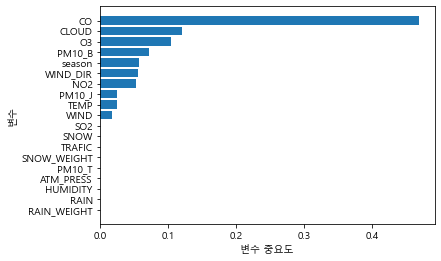

In [81]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))

plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

의사결정나무 모델링 요인 평가 
  
(10점 만점 - 요인중요도* 10) 
   
1.	CO	5.0  
2.	CLOUD	1.4  
3.	O3	1.1  
4.	PM10_B	0.7  
5.	season	0.5  
7.	WIND_DIR	0.5 
8.	NO2	0.5  
9.	PM10_J	0.3  

### 4-4 랜덤포레스트 모델링

In [82]:
from sklearn.ensemble import RandomForestRegressor

4-4-1 데이터 구성하기

In [83]:
# 목표 변수, 설명 변수 데이터 지정
df_raw_y = df_raw["PM10"]
df_raw_x = df_raw.drop("PM10", axis=1, inplace=False)

In [84]:
# 데이터 분할

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)

print("train data x size : {}".format(df_train_x.shape))
print("train data y size : {}".format(df_train_y.shape))
print("test data x size : {}".format(df_test_x.shape))
print("test data y size : {}".format(df_test_y.shape))

train data x size : (256, 19)
train data y size : (256,)
test data x size : (110, 19)
test data y size : (110,)


4-4-2 모델 생성

In [85]:
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print("Score on traing set : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))

# test 데이터 설명력
print("Score on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on traing set : 0.927
Score on test set : 0.451


In [86]:
# train, test 설명력 결과 저장
train_score = []; test_score = []

# n_estimators : 트리수 변경
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators=v_n_estimators, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))


# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

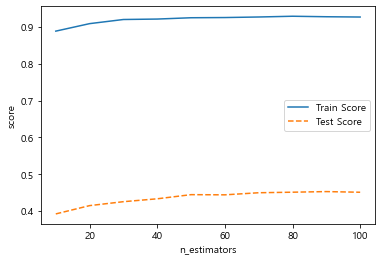

In [87]:
# 모델 설명력 확인
df_score_n.round(3)

# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle="-", label="Train Score")
plt.plot(para_n_tree, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("n_estimators")
plt.legend()

- 생성하는 결정 트리 수 증가에 따라 모델의 설명력은 증가합니다.    
- 트리 수가 30개를 초과해도 설명력은 거의 향상되지 않습니다.  
- 최대 트리 수에 따른 영향을 배제하고 다른 파라미터의 영향을 확인하고자 100 선택

min_samples_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [88]:
# train, test 설명력 결과 저장
train_score = []; test_score = []

# min_samples_leaf : 잎사귀 최소 자료수
para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 100,
                    min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

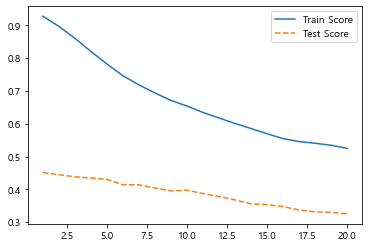

In [89]:
# 모델 설명력 확인
df_score_leaf.round(3)

# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.legend()

- 잎사귀 노드 최소 자료 수 증가에 따라 모델의 설명력은 감소합니다.  
- test 데이터의 정확도 변화를 고려하여 7 선택

min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능

In [90]:
# train, test 설명력 결과 저장
train_score = []; test_score = []

# min_samples_split : 분할하기 위한 노드의 최소 자료수
para_split = [n_split * 2 for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=1234, n_estimators=100, min_samples_leaf=7,
                    min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

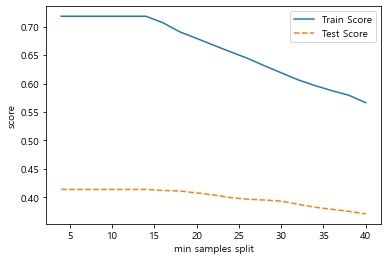

In [91]:
# 모델 설명력 확인
df_score_split.round(3)

# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

- 분리 노드 최소 자료 수 증가에 따라 모델의 설명력은 감소
- train/test 데이터의 성능 변화를 고려하여 15 선택

max_depth : 최대 깊이 변경에 따른 모델 성능

In [92]:
# train, test 설명력 결과 저장
train_score = []; test_score = []
# max_depth : 최대 길이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=1234, n_estimators=100,
                min_samples_leaf=7, min_samples_split=15, 
                max_depth=v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

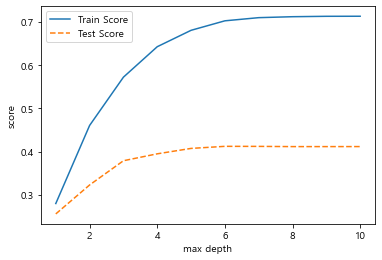

In [93]:
# 모델 설명력 확인
df_score_depth.round(3)

# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("max depth")
plt.legend()

- 최대 깊이 증가에 다라 모델의 설명력은 증가합니다.
- train/test 데이터의 성능 변화를 고려하여 8 선택

결론 도출 

In [94]:
rf_final = RandomForestRegressor(random_state=1234, n_estimators=100, min_samples_leaf=7, 
                                    min_samples_split=15, max_depth=8)
rf_final.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("score of training set : {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("score of test set : {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

score of training set : 0.712
score of test set : 0.412


최종 모델 시각화 : 생성된 트리 100개 중에서 임의의 3개 확인

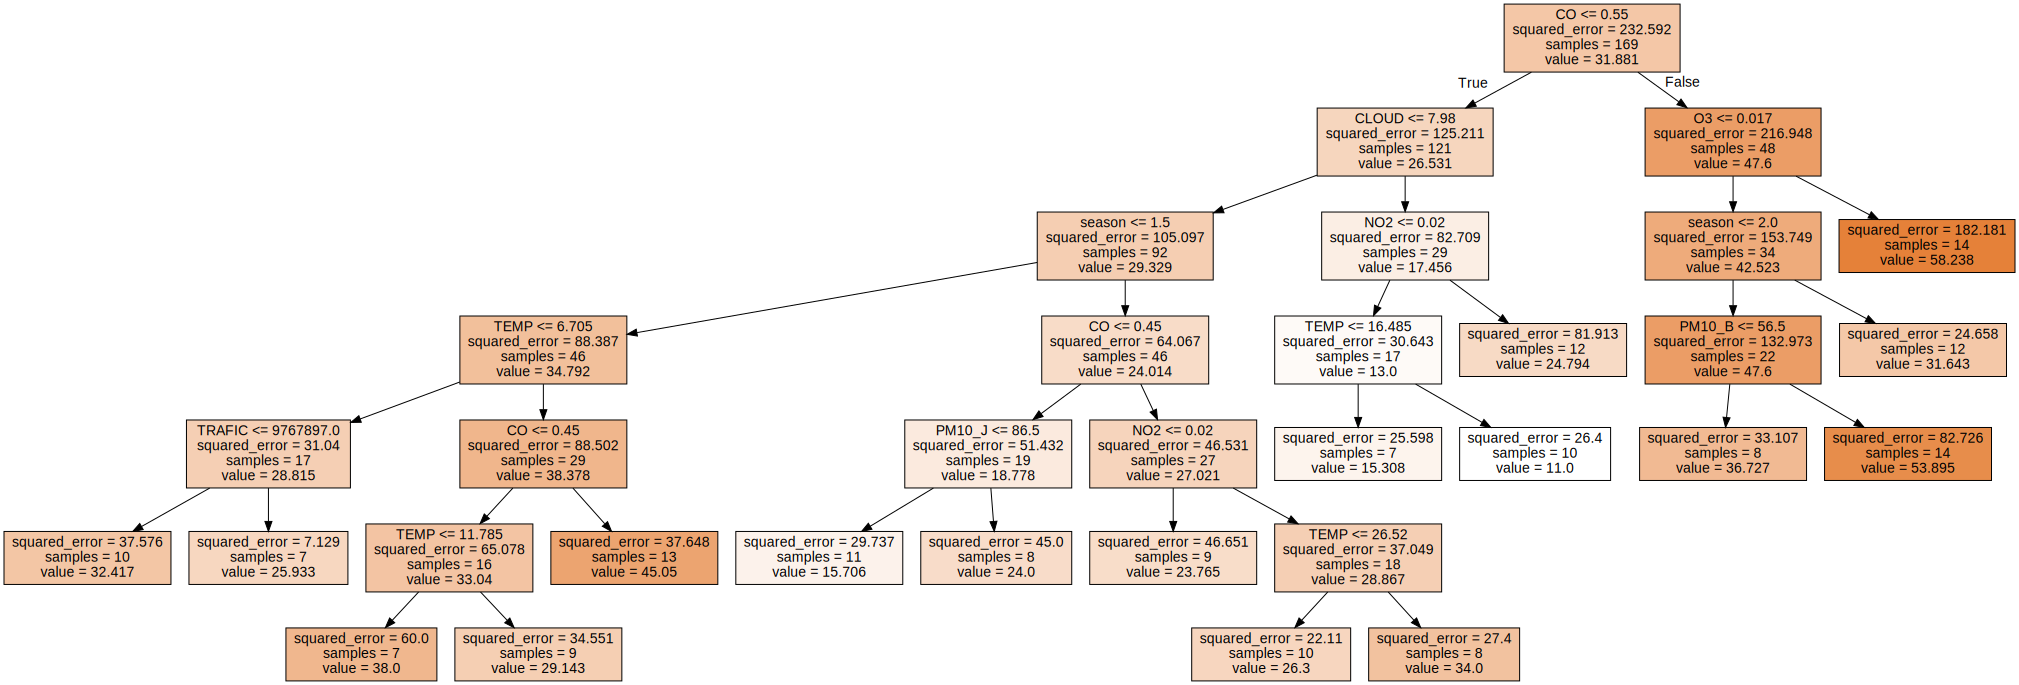

In [95]:
# 변수명 저장
v_feature_name = df_train_x.columns
# 0번 트리
export_graphviz(rf_final.estimators_[0], out_file = "rfr_final_0.dot", feature_names = v_feature_name, impurity = True, filled = True)
with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

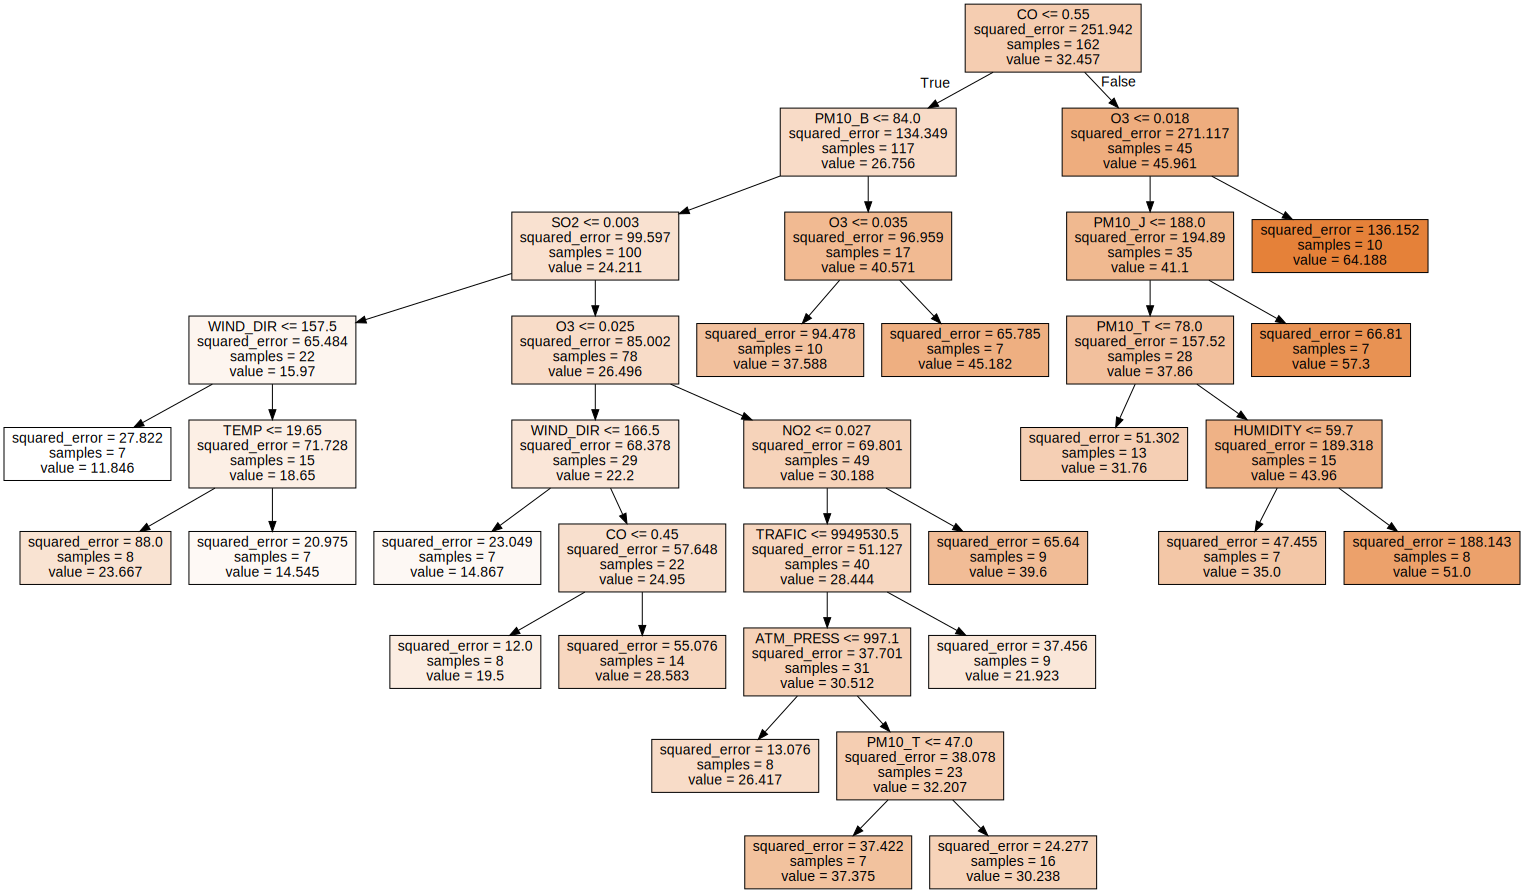

In [96]:
# 1번 트리
export_graphviz(rf_final.estimators_[1], out_file="rfr_final_1.dot", feature_names=v_feature_name, impurity=True, filled=True)
# tree_final_1.dot 그리기
with open("rfr_final_1.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

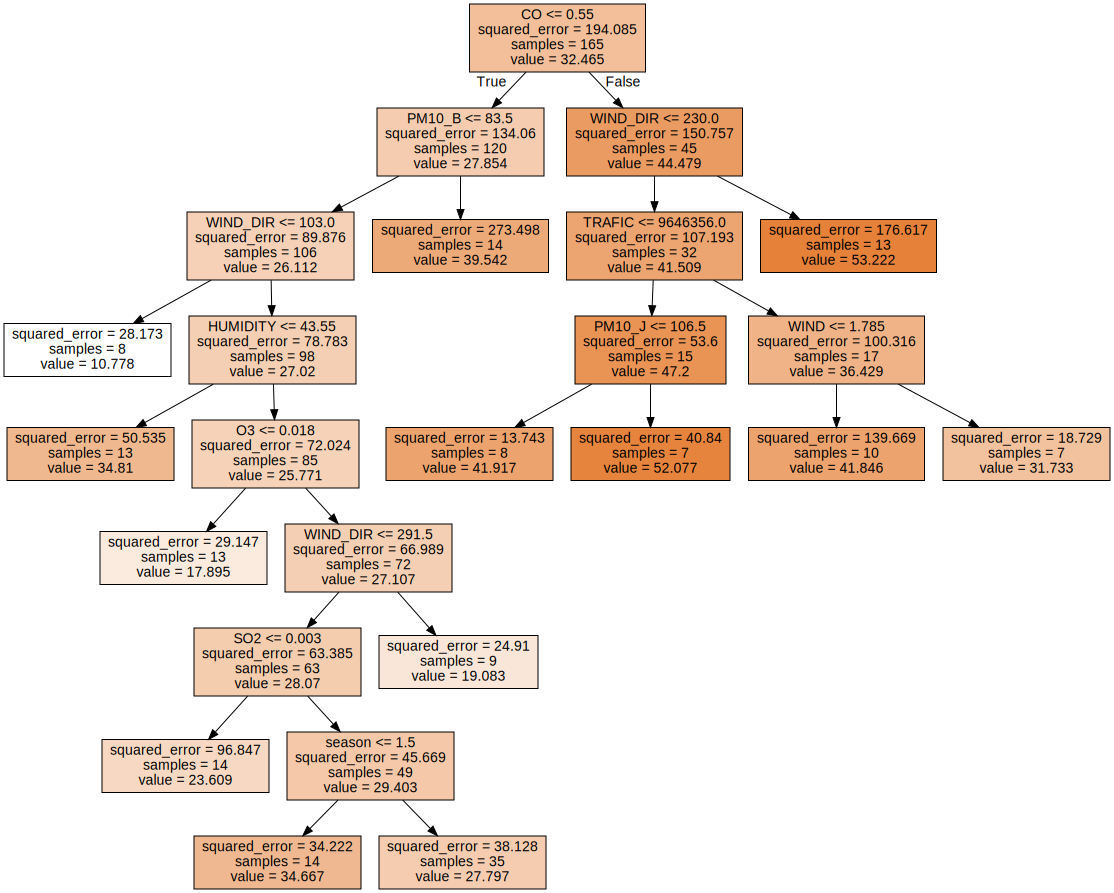

In [97]:
# 10번 트리
export_graphviz(rf_final.estimators_[10], out_file="rfr_final_10.dot",feature_names=v_feature_name, impurity=True, filled=True)
# tree_final_10.dot 그리기
with open("rfr_final_10.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

- 위와 같은 트리 100개(n_estimatros=100으로 지정)를 조합하여 최종 모델 생성

In [98]:
# tree.feature_importances_로 설명변수 중요도 확인 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
5,CO,0.418
3,O3,0.104
16,CLOUD,0.071
1,PM10_J,0.067
2,PM10_B,0.061
18,season,0.058
11,WIND_DIR,0.046
4,NO2,0.032
6,SO2,0.030
17,TRAFIC,0.029


Text(0, 0.5, '변수')

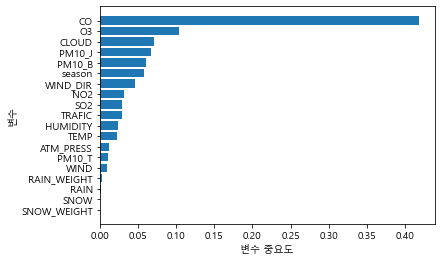

In [99]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))

plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

- 중요 설명변수: CO(일산화탄소 농도), O3(오존), 전운량(CLOUD) 순으로 영향이 크다고 해석할 수 있습니다.
- 단, 계산된 변수 중요도 값이 낮거나 0이더라도 선택되는 데이터에 따라 중요도가 변경될 수 있습니다.

In [100]:
estimator = RandomForestRegressor()
param_grid = {"max_depth":para_depth,"min_samples_split":para_split, "min_samples_leaf":para_leaf}
            
grid_dt = GridSearchCV(estimator, param_grid, scoring = "r2", n_jobs = -1)

grid_dt.fit(df_train_x, df_train_y)

print("best estimator model:\n{}".format(grid_dt.best_estimator_))
print("\nbest parameter model:\n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))

best estimator model:
RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=4)

best parameter model:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4}

best score:
0.495


In [101]:
df_pred = pd.DataFrame({'prediction':tree_final.predict(df_test_x)}) #예측값
df_pred.describe()

,prediction
count,110.000000
mean,32.511688
std,12.830615
min,8.833333
25%,25.863445
50%,30.780000
75%,39.440000
max,59.000000


In [102]:
df_test_y.describe()

count    110.000000
mean      34.945455
std       17.006656
min       10.000000
25%       22.000000
50%       33.000000
75%       43.750000
max      101.000000
Name: PM10, dtype: float64

In [103]:
#결론도출
v_feature_name=df_train_x.columns
#tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=rf_final.feature_importances_

#df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
5,CO,0.418
3,O3,0.104
16,CLOUD,0.071
1,PM10_J,0.067
2,PM10_B,0.061
18,season,0.058
11,WIND_DIR,0.046
4,NO2,0.032
6,SO2,0.030
17,TRAFIC,0.029


랜덤포레스트 모델링 요인 평가 
  
(10점 만점 - 요인중요도* 10) 
   
1.	CO	4.6
2.	O3	1.3
3.	CLOUD	0.8
4.	PM10_J	0.7
5.	PM10_B	0.7
6.	season	0.6
7.	WIND_DIR 0.5
8.	NO2	0.4
9.	SO2	0.4


### 4-5 그래디언트 부스팅 모델링

In [104]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

데이터 구성하기

In [105]:
# 목표 변수, 설명 변수 데이터 지정
df_raw_y = df_raw["PM10"]
df_raw_x = df_raw.drop("PM10", axis=1, inplace=False)

In [106]:
# 데이터 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)
print("train data x size : {}".format(df_train_x.shape))
print("train data y size : {}".format(df_train_y.shape))
print("test data x size : {}".format(df_test_x.shape))
print("test data y size : {}".format(df_test_y.shape))

train data x size : (256, 19)
train data y size : (256,)
test data x size : (110, 19)
test data y size : (110,)


모델 생성

In [107]:
# 기본 옵션으로 모델 생성
gb_uncustomized = GBR(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 설명력
print("Score on traing set : {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set : {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on traing set : 0.946
Score on test set : 0.466


n_estimators : 트리 수 변경에 따른 모델 성능

In [108]:
# train, test 설명력 결과 저장
train_score = []; test_score = []

# n_estimators : 트리수 변경
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    gb = GBR(n_estimators=v_n_estimators, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

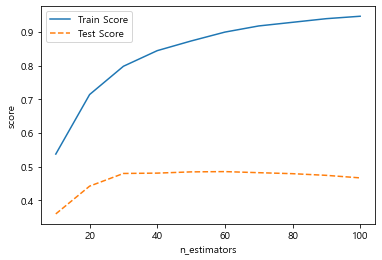

In [109]:
# 모델 설명력 확인
df_score_n.round(3)

# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle="-", label="Train Score")
plt.plot(para_n_tree, test_score, linestyle="--", label="Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

- 생성하는 결정 트리 수 증가에 따라 모델의 설명력은 증가
- Test 데이터의 성능 변화를 고려하여 100 선택

min_samples_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [110]:
# train, test 설명력 결과 저장
train_score = []; test_score = []

# min_samples_leaf : 입사귀 최소 자료수
para_leaf = [n_leaf*1 for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    gb = GBR(random_state=1234, 
             n_estimators=100,
             min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

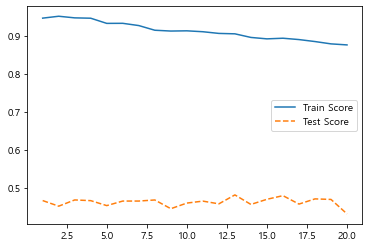

In [111]:
# 모델 설명력 확인
df_score_leaf.round(3)

# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.legend()

- 잎사귀 노드 최소 자료 수 증가에 따라 모델의 설명력은 감소합니다.
- test 데이터의 성능 변화를 고려하여 13 선택

min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능

In [112]:
# train, test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_split : 분할하기 위한 노드의 최소 자료 수
para_split = [n_split * 2 for n_split in range(1, 21)]

for v_min_samples_split in para_split:
    gb = GBR(random_state=1234,
             n_estimators=100,
             min_samples_leaf=10,
             min_samples_split=v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

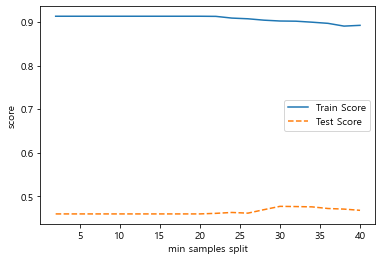

In [113]:
# 모델 설명력 확인
df_score_split.round(3)

# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("min samples split")
plt.legend()

- 분리 노드 최소 자료 수 증가에 따라 모델의 설명력은 다소 감소합니다.
- train/test 데이터의 성능 변화를 고려하여 30 선택합니다.

max_depth : 최대 깊이 변경에 따른 모델 성능

In [114]:
# train, test 설명력 결과 저장
train_score = []; test_score = []

# max_depth : 최대 길이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GBR(random_state=1234, 
             n_estimators=100,
             min_samples_leaf=10, 
             min_samples_split=20, 
             max_depth=v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

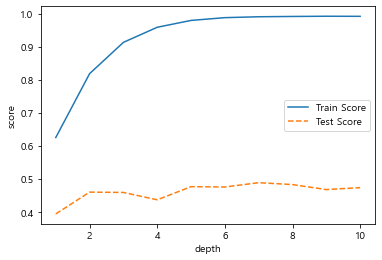

In [115]:
# 모델 설명력 확인
df_score_depth.round(3)

# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("depth")
plt.legend()

- 최대 깊이 증가에 다라 모델의 설명력은 증가합니다.
- train/test 데이터의 성능 변화를 고려하여 4 선택

learning_rate : 학습률 변경에 따른 모델 성능

In [116]:
# train, test 설명력 결과 저장
train_score = []; test_score = []

# learning rate : 학습률 변경 0.1 ~ 0.9
para_lr = [lr*0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GBR(random_state=1234, 
             n_estimators=100,
             min_samples_leaf=10, 
             min_samples_split=20, 
             max_depth=7, 
             learning_rate=v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))


# 결과 저장
df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score

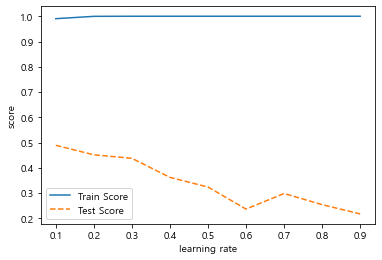

In [117]:
# 모델 설명력 확인
df_score_lr.round(3)

# 모델 설명력 그래프 확인
plt.plot(para_lr, train_score, linestyle="-", label="Train Score")
plt.plot(para_lr, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("learning rate")
plt.legend()

- 학습률 증가에 따라 모델의 설명력은 증가
- test 데이터의 성능 급격하게 저하되어 0.1 선택
- 0.1~-0.2 사이의 세밀한 변화에 따른 성능 변화 확인 핑료

결론 도출

In [118]:
gb_final = GBR(random_state=1234, n_estimators=100, min_samples_leaf=10, 
               min_samples_split=15, max_depth=7, learning_rate=0.1)
gb_final.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("score of training set : {:.3f}".format(gb_final.score(df_train_x, df_train_y)))

# Test 데이터 설명력
print("score of test set : {:.3f}".format(gb_final.score(df_test_x, df_test_y)))
      

score of training set : 0.990
score of test set : 0.489


In [119]:
from sklearn.ensemble import GradientBoostingRegressor

In [120]:
estimator = GradientBoostingRegressor(random_state = 1234)
param_grid = {"max_depth":para_depth,"min_samples_leaf":para_leaf,
                'learning_rate':para_lr, 'max_features':['auto','sqrt','log2'],
                'criterion':['mse','friendman_mse','mae']}
            
grid_gb = GridSearchCV(estimator, param_grid, scoring = "r2", n_jobs = -1)

grid_gb.fit(df_train_x, df_train_y)

print("best estimator model:\n{}".format(grid_dt.best_estimator_))
print("\nbest parameter model:\n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))

best estimator model:
RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=4)

best parameter model:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4}

best score:
0.495


c:\dev\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
54000 fits failed out of a total of 81000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27000 fits failed with the following error:
Traceback (most recent call last):
  File "c:\dev\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\dev\Python310\lib\site-packages\sklearn\ensemble\_gb.py", line 533, in fit
    raise ValueError(
ValueError: criterion='friendman_mse' is not supported. Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.

---------------------------

In [121]:
# 변수명 저장
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
5,CO,0.344
3,O3,0.111
16,CLOUD,0.074
2,PM10_B,0.072
11,WIND_DIR,0.067
1,PM10_J,0.065
18,season,0.049
17,TRAFIC,0.041
12,HUMIDITY,0.039
7,TEMP,0.033


Text(0, 0.5, '변수')

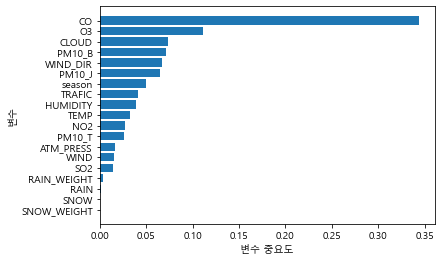

In [122]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))

plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

- CO(일산화탄소 농도), O3(오존), 전운량(CLOUD), PM10_B(베이징 미세먼지량) 순으로 영향이 큼
- 단, 계산된 변수 중요도 값이 낮거나 0이더라도 선택되는 데이터에 따라 중요도가 변경될 수 있습니다.

In [123]:
df_pred = pd.DataFrame({'prediction':gb_final.predict(df_test_x)}) #예측값
df_pred.describe()

,prediction
count,110.000000
mean,32.796349
std,12.213136
min,11.984246
25%,23.572073
50%,29.996735
75%,40.184523
max,66.653854


In [124]:
df_test_y.describe() #실제값

count    110.000000
mean      34.945455
std       17.006656
min       10.000000
25%       22.000000
50%       33.000000
75%       43.750000
max      101.000000
Name: PM10, dtype: float64

In [125]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance",ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,CO,0.344
3,O3,0.111
16,CLOUD,0.074
2,PM10_B,0.072
11,WIND_DIR,0.067
1,PM10_J,0.065
18,season,0.049
17,TRAFIC,0.041
12,HUMIDITY,0.039
7,TEMP,0.033


그래디언트 부스팅 모델링 요인 평가 
  
(10점 만점 - 요인중요도* 10) 
  
1. CO	3.9
2. O3	1.5
3. CLOUD	1.0
4. PM10_B	0.8
5. WIND_DIR 0.7
6. PM10_J	0.7
7. season	0.5
8. TRAFIC	0.5
9. HUMIDITY 0.4

In [126]:
# 남은 변수들로 회귀 모델 생성
lr= smf.ols(formula="PM10~ CO + O3 + CLOUD + PM10_B + WIND_DIR", data = df_raw)

# 직접 회귀분석 표를 확인해보자
lr_result = lr.fit()
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     58.00
Date:                Mon, 15 Aug 2022   Prob (F-statistic):           3.55e-44
Time:                        22:05:36   Log-Likelihood:                -1423.5
No. Observations:                 366   AIC:                             2859.
Df Residuals:                     360   BIC:                             2883.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.3275      5.023     -5.441      0.0

In [127]:
#예측 및 평가
models = ["Regression", "Decision Tree", "Random Forest", "Gradient Boosting"]

mse, rmse, mae, mape = [],[],[],[]


lr_y_pred = lr_result.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))

# 의사결정나무
dt_y_pred = tree_final.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

# 랜덤포레스트
rf_y_pred = rf_final.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

# 그래디언트 부스팅
gb_y_pred = gb_final.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

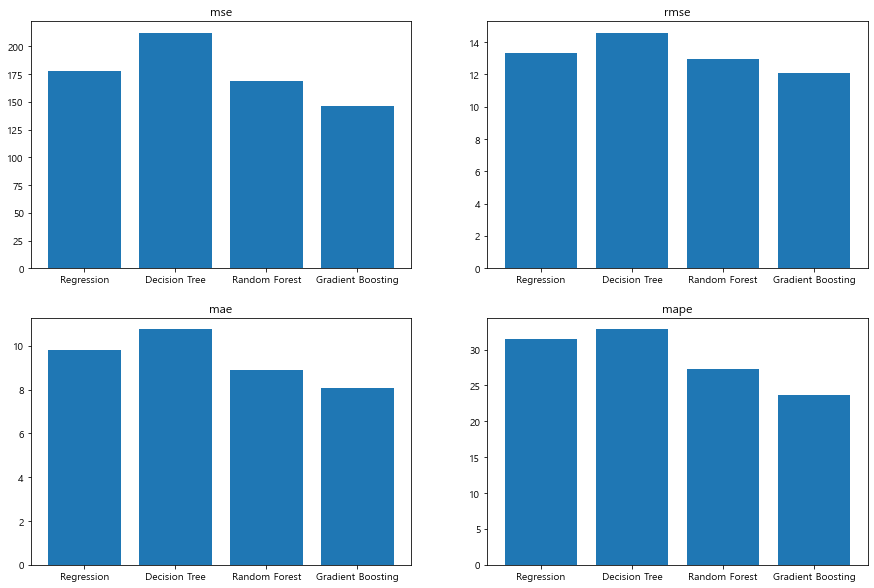

In [128]:
#시각화 - 평가
fig, ax = plt.subplots(2,2, figsize = (15,10))
ax[0,0].bar(models, mse)
ax[0,0].set_title("mse").set_fontsize(12)

ax[0,1].bar(models, rmse)
ax[0,1].set_title("rmse").set_fontsize(12)

ax[1,0].bar(models, mae)
ax[1,0].set_title("mae").set_fontsize(12)

ax[1,1].bar(models, mape)
ax[1,1].set_title("mape").set_fontsize(12)